### **2025 SDSU Data Science Symposium
### South Dakota State University, Brookings SD**

**Date of Session:** February 6, 2025 

**Instructor(s):** Cameron Pykiet, Jaylin Dyson, Bishnu Sarker

**Affiliation:** Meharry Medical College School of Applied Computational Sciences, Tennessee, USA

# Creating Your own Streamlit Application(s)

### 1. **Overview**
In this tutorial, we will go over `streamlit` and the basic fuctions used for creating a user-interface that will carry over into further applications. 'Streamlit' is a python package that takes .py scripts to easily create web applications.

---

###  2. **Prerequisites**
- **Python 3.7+**
- Basic knowledge of Python programming
- Install **Ollama** and **Streamlit**

---

### 3. Step 1: Installing the Required Packages
Before making the applications, make sure to have both **streamlit** and **pandas** installed.

    ```python
    !pip install streamlit pandas
    ```
---

### 3. Step 2: Setting up Project Directory
Create a new directory (folder) and navigate to it. 
1. Create folder `Tutorial_applications`.
    - Use `%mkdir {file_name}` to make a file directory through Jupyter. 
    ---
2. Create a file `start_app.py` under the folder
    - Use `%%writefile Tutorial_applications/1_start_app.py` to create the file in that file directory

---
### 3. Step 3: Create a Simple Streamlit App
Either open the `1_start_app.py` file or edit via notebook using the `%%writefile -a {.py}` as shown in this demo.

Write the basic structure for the application:

```python
%%writefile Tutorial_applications/1_start_app.py

import streamlit as st

# Title of App
st.title('Hello, World! This is _____')
```

Run and see this file by using the command prompt within the directory:

```bash
cd Downloads/Tutorial_applications streamlit run 1_start_app.py
```
Or run via jupyter notebook:
```python
!streamlit run 1_start_app.py
```


In [1]:
!pip install streamlit pandas

In [ ]:
#%mkdir Tutorial_applications

In [ ]:
#%mkdir pages

In [227]:
%%writefile pages/1_start_app.py

import streamlit as st
# Optional
st.set_page_config(layout="wide")

st.title("Hello, World! This is Cameron!")
st.write('This is an intro to Streamlit!')

Overwriting pages/1app.py


#### Explaination:
- `st.set_page_config()` Sets the application in wide mode when opened
- `st.title()` Creates a title for the app
- `st.write()` Writes normal text

# Text elements for streamlit
We can add onto an existing .py file by appending code to it using the `-a` after the `%%writefile`. However, be careful when rerunning the code as it will append multiplease times if prompted. 

In [228]:
%%writefile -a pages/1_start_app.py

st.header('This is a demonstration of how to build an app with streamlit.')

Appending to pages/1app.py


In [229]:
%%writefile -a pages/1_start_app.py

st.caption('We are currently going over the different kind of text elements that can be used.')

Appending to pages/1app.py


In [230]:
%%writefile -a pages/1_start_app.py

st.markdown('## Such as a **markdown** text')

Appending to pages/1app.py


In [231]:
%%writefile -a pages/1_start_app.py

st.code('''
        #Or even lines of code. 
        x = 7
        y = 10
        z = x+y
        print(z)
        ''')

Appending to pages/1app.py


In [232]:
%%writefile -a pages/1_start_app.py
# and Add a divider
st.divider()

col1, col2 = st.columns(2, gap = 'large')
col1.subheader("Left side?")
col2.subheader("Right side?")

Appending to pages/1app.py


In [233]:
%%writefile -a pages/1_start_app.py

chat = col1.chat_input('Have you ever been to Mount Rushmoore?')

if chat == 'yes':
    st.write("So have I! Though it was underwhelming in my opinion.")


Appending to pages/1app.py


#### Explaination:
- `st.header()` Creates text in a header format
- `st.caption()` Creates text as a caption
- `st.markdown()` Creates text that follows markdown syntax
- `st.code()` Creates a block of text as code
- `st.divider()` Creates a visible divider within the app
- `st.columns()` Divides the screen into equal parts accessible by a `column1.write()` format
- `st.subheader()` Creates text in a subheader format
- `st.chat_input()` Creates a text box that allows for input as a chat that can be used in the code

--- 
#### **Test app locally**
Test your application locally by running in directory:
```
streamlit run pages/1_start_app.py
```

!streamlit run 1_start_app.py

## Data within Streamlit
Now we are going to create another app that will look at how to implement data as a pandas DataFrame into Streamlit. The dataset we will use comes from kaggle and can be downloaded directly from there. The Github will have a subset of this dataset with ~100k rows.
   https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield

--- 

### Install pandas
`Pandas` is a python library that utilizes a table like structure called a DataFrame. The DataFrame has many functions used for data analysis, visualization, wrangling, and many others. 

```python
!pip install pandas
```

--- 

#### Load in the dataset
Use `pd.read_csv()` to read in a dataset as a pandas DataFrame

In [4]:
import pandas as pd

ag_data = pd.read_csv('crop_yield100k.csv')
ag_data

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,North,Loam,Barley,326.222372,18.802729,True,False,Sunny,103,3.293058
1,East,Chalky,Barley,353.680491,21.345293,True,False,Sunny,131,4.111838
2,West,Loam,Barley,540.121608,19.985115,True,False,Sunny,97,3.842854
3,North,Peaty,Barley,100.949587,20.406286,True,True,Rainy,91,3.010782
4,North,Peaty,Barley,244.914473,20.654499,False,True,Rainy,143,2.775471
...,...,...,...,...,...,...,...,...,...,...
99991,East,Sandy,Wheat,417.769774,15.525857,False,True,Rainy,91,3.404224
99992,East,Clay,Wheat,984.840547,30.175197,True,False,Cloudy,105,6.463376
99993,South,Sandy,Wheat,270.776168,29.661645,True,False,Rainy,126,3.875689
99994,North,Chalky,Wheat,734.316627,18.999243,False,True,Sunny,71,5.996584


In [235]:
%%writefile pages/2_data_app.py

import pandas as pd
import streamlit as st

ag_data = pd.read_csv('crop_yield.csv')

st.dataframe(ag_data)

Overwriting pages/2data_app.py


#### Explaination:
- `pd.read_csv()` Will read in a 'csv' file 
- `st.dataframe()` Creates a table of the DataFrame in the web app

### Upload your own dataset
We are going to overide the previous file to create this interface iteratively.

In [236]:
%%writefile pages/2_data_app.py

import pandas as pd
import streamlit as st

st.title('Show data from a CSV file')
st.caption('This Example makes use of the python package "pandas" and the functions it has.')
#uploading csv file as a dataframe
file = st.file_uploader('Input CSV file here:', type = ['csv'])
if file:
    df = pd.read_csv(file)
    st.dataframe(df)
    


Overwriting pages/2data_app.py


#### Explaination:
- `st.file_uploader()` Creates a widget for uploading a file. File specification via 'type'

### Creating a way to sort through the inputted file via Dataframe functions

In [237]:
%%writefile pages/2_data_app.py
import pandas as pd
import streamlit as st

st.title('Show data from a CSV file')
st.caption('This Example makes use of the python package "pandas" and the functions it has.')

#uploading csv file as a dataframe
file = st.file_uploader('Input CSV file here:', type = ['csv'])

if file:
    # read in dataframe
    df = pd.read_csv(file)
    
    # Get dataframe column names
    cols = list(df.columns)
    
    # Select box to choose which columns in dataframe
    select = st.multiselect('Choose columns:', cols, default = cols)
    st.dataframe(df[select])

Overwriting pages/2data_app.py


#### Explaination:
- `st.multiselect` creates a widget for selecting multiple items from a list

### Getting Statistics

In [238]:
%%writefile pages/2_data_app.py
import pandas as pd
import streamlit as st

st.title('Show data from a CSV file')
st.caption('This Example makes use of the python package "pandas" and the functions it has.')

#uploading csv file as a dataframe
file = st.file_uploader('Input CSV file here:', type = ['csv'])

if file:
    # read in Dataframe
    df = pd.read_csv(file)
    
    # Get Dataframe column names
    cols = list(df.columns)
    
    #Select box to look at chosen columns
    select = st.multiselect('Choose columns:', cols, default = cols)
    st.dataframe(df[select])
    
    # Choice for adding a statistical analysis (numerical values)
    answer = st.radio(
    "Get a statistical analysis of current dataframe?",['Yes','No']
    , index = 1)
    
    if answer == 'Yes':
        st.write(df[select].describe())
        

Overwriting pages/2data_app.py


#### Explaination:
- `.describe()` Using pandas dataframe, describe will get a statistcal analysis of numerical columns withing the dataframe. (min,max,mean, etc) 

### Sort by column values

In [239]:
%%writefile pages/2_data_app.py
import pandas as pd
import streamlit as st

# Optional
st.set_page_config(layout="wide")


st.title('Show data from a CSV file')
st.caption('This Example makes use of the python package "pandas" and the functions it has.')

#uploading csv file as a dataframe
data_file = st.file_uploader('Input CSV file here:', type = ['csv'])

if data_file:
    # Read in Dataframe
    df = pd.read_csv(data_file)
    
    # Get Dataframe column names
    cols = list(df.columns)
    
    # Select box to look at chosen columns
    select = st.multiselect('Choose columns:', cols, default = cols)
    
    # Additional selection box to sort through columns (object dtypes)
    sort = st.selectbox('Sort by value in specific column:', df[select].select_dtypes(include='object').columns.tolist(), index = None)
    if sort != None:
        df1 = df[select]
        # Sort with specific value
        val = st.selectbox('What Value:', list(df1[sort].unique()), index = None)
        
        if val:
            # display sorted dataframe
            sort_df =  df1[df1[sort] == val]
            st.dataframe(sort_df)
    else:
        # display unsorted dataframe
        sort_df = df[select]
        st.dataframe(sort_df)
    
    # Choice for adding a statistical analysis (numerical dtypes)
    answer = st.radio(
    "Get a statistical analysis of current dataframe?",['Yes','No'],
    index = 1)
    if answer == 'Yes':
        st.write(sort_df.describe())

Overwriting pages/2data_app.py


#### Explaination:
- `st.radio()` Creates a widget with with toggle buttons, (Yes,No) in this case. 

---

## Plotting data 
We will be utilizing `matplotlib` and `seaborn` as our visualization packages. For this demo we will create a scatterplot with the seaborn library and use matplotlib for plotting. 

##### install necessary packages
```python
!pip install seaborn matplotlib
```

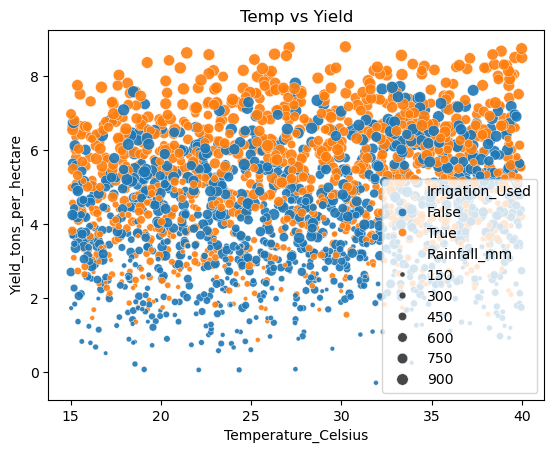

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt


d = ag_data[(ag_data['Region'] == 'West') & (ag_data['Soil_Type'] == 'Sandy') & (ag_data['Weather_Condition'] == 'Cloudy') & (ag_data['Crop'] == 'Cotton')]

sns.scatterplot(data = d, x = 'Temperature_Celsius', y = 'Yield_tons_per_hectare', size = 'Rainfall_mm', legend = True, sizes = (10,75), hue = 'Irrigation_Used', alpha = .9)
plt.title('Temp vs Yield')

plt.show()

#### Explaination:
- `sns.scatterplot` Generates a scatterplot with the seaborn library. Has input options for data, x-variable, y-variable, size, and hue to be variables from the data
- `plt.title()` Creates a title for the visual
- `plt.show()` Generates the visual through matplotlib.pyplot

---

## Creating Visualization Streamlit Application

In [201]:
%%writefile pages/3_data_visualization.py

import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
st.set_page_config(layout="wide")

st.title('Plotting data from a CSV file')
st.caption('This Example makes use of a scatterplot via the "seaborn" and "pandas"')
plot_file = st.file_uploader('Input CSV file here:', type = ['csv'])

if plot_file:
    # Load in the data into Dataframe
    df = pd.read_csv(plot_file)
    
    # Separating columns by data type to create plot
    obj_cols = df.select_dtypes(include = ['object']).columns.tolist()
    num_cols = df.select_dtypes(include = ['number']).columns.tolist()
    bool_cols = df.select_dtypes(include = ['bool']).columns.tolist()
     
    # Separate Sides to variables on left and plot on right
    col1, col2 = st.columns(2, gap = 'large')
    col1.write("Variables")
    
    # Creating a list of Column values to select for filtering in the dataset
    # Suggestion: add a multiselect box to choose which columns used for filtering
    filters = {}
    
    for i in obj_cols:
        choices = list(df[i].unique())
        choice = col1.selectbox(f'Sort by which {i} value?', choices)
        filters[i] = choice
    
    # Creates a string of SQL-like logic to access specific values in a dataframe
    query_string = " and ".join([f"{col} == '{val}'" for col, val in filters.items()])

    # Executes the query string for the Specified DataFrame
    df1 = df.query(query_string)
    
    # Choose which Variables for the Scatter Plot
    x_val = col1.selectbox('Choose X variable', num_cols)
    y_val = col1.selectbox('Choose Y variable', num_cols,index = 1)
    size_by = col1.selectbox('Size by:', num_cols)
    bool_val = col1.selectbox('Color by:', bool_cols)
    
    # Create plot for selected values
    if x_val and y_val:
        fig, ax = plt.subplots(figsize=(10,8))
        sns.scatterplot(
            data = df1,
            x = x_val,
            y = y_val,
            hue = bool_val,
            size = size_by,
            sizes = (10,75),
            alpha = .9
    )
    # Display figure in column 2    
    col2.pyplot(fig)
    

Overwriting pages/3data_plot.py


#### Explaination:
- `df.select_dtypes()` Used to select columns with the specified data type in them. This will help with data filtering for the visualization.
- `df.query()` Allows for a SQL-like query to be read into the Dataframe for filtering based on a query
- `plt.subplots()` Creates a plot of desired size with 'figsize'
- `sns.scatterplot()` Creates the scatterplot with designated changes via variables
- `st.pyplot()` Display designated matplotlib.pyplot figure (col2 to designate column)

---

### Putting all applications together

In [195]:
%%writefile your_app.py

import streamlit as st

st.set_page_config(
    page_title = 'Your Own App!',
)

st.title('You have now created your own application!')

st.sidebar.success('Look here to see prior apps')



Overwriting your_app.py


#### Explaination: 
- `st.set_page_config()` Creates access to other apps within 'pages' folder for quick access
- `st.sidebar.success()` Creates a togglable sidebar to access other designated pages

!streamlit run your_app.py

# Conclusion:
After following the template, you should have an application that has 4 total pages: **title page, start app, data app, data visualization**. These applications demonstrate basic `streamlit` functions that can be generalized to larger/specific projects. Follow along this tutorial to examples of such applications. 

### You can access all of the various tools in streamlit by sourcing the website: https://streamlit.io